In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/Burxoniddin-data/aviacompany_customer_satisfaction/main/train_dataset.csv")
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [4]:
train_data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


## Now we should clean the data which is here to take care of missing values


In [6]:
class Arrival_nan_val(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy='median')
        X['Arrival Delay in Minutes'] = imputer.fit_transform(X[['Arrival Delay in Minutes']])
        return X

In [7]:
class CategoryCol(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
        encoder = LabelEncoder()
        for col in categorical_columns:
            X[col] = encoder.fit_transform(X[col])
        return X

In [8]:
class ScalarNum(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        numerical_columns = [
            'Age', 'Flight Distance', 'Inflight wifi service',
            'Departure/Arrival time convenient', 'Ease of Online booking',
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
            'Inflight entertainment', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Inflight service',
            'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'
        ]
        scaler = StandardScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
        return X

In [9]:
pipeline = Pipeline(
    [
        ("handling missing value", Arrival_nan_val()),
        ("category columns", CategoryCol()),
        ("scaling numuric columns", ScalarNum())
    ]
)

In [10]:
prepared_train_data = pipeline.fit_transform(train_data)
prepared_train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,1,-0.427939,0,1,-0.644234,-0.572550,-0.042626,-0.561397,...,0.448356,-0.356237,-1.845879,-0.568385,0.508106,-0.578779,0.525416,-0.111703,-0.291748,0
1,2,0,0,0.646087,0,0,0.197063,0.895150,-1.352178,0.845966,...,1.199245,1.212744,1.210591,1.112730,-0.286555,1.123263,-0.237272,-0.363861,-0.366756,1
2,3,0,0,0.243327,0,1,-0.354672,-1.306399,0.612150,0.845966,...,-1.804311,-1.925218,-1.845879,-2.249501,-1.875876,-2.280821,-0.999961,-0.363861,0.083291,0
3,4,0,0,-0.830699,0,0,0.313475,0.161300,-0.042626,0.142285,...,-1.053422,0.428253,0.446474,1.112730,1.302767,0.272242,-0.999961,-0.363861,-0.366756,1
4,5,1,0,-1.904725,1,1,-0.688256,0.161300,0.612150,0.142285,...,0.448356,1.212744,-1.081761,1.112730,-0.286555,1.123263,0.525416,-0.363861,-0.116730,0


## Now lets analyze the data by plotting

Firstly let's create Distribution of Satisfaction

C:\Users\Victus\AppData\Local\Temp\ipykernel_15908\3246742680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=prepared_train_data, palette='coolwarm')


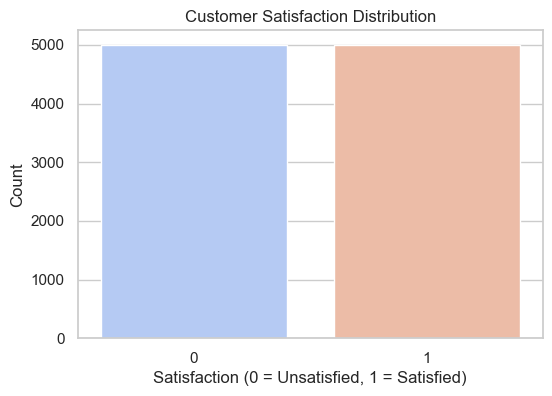

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
sns.countplot(x='satisfaction', data=prepared_train_data, palette='coolwarm')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction (0 = Unsatisfied, 1 = Satisfied)')
plt.ylabel('Count')
plt.show()

So the satisfaction is 50 to 50 which means that 5000 people are satisfied and remaining 5000 are not.
Now let's see the correlation between columns.

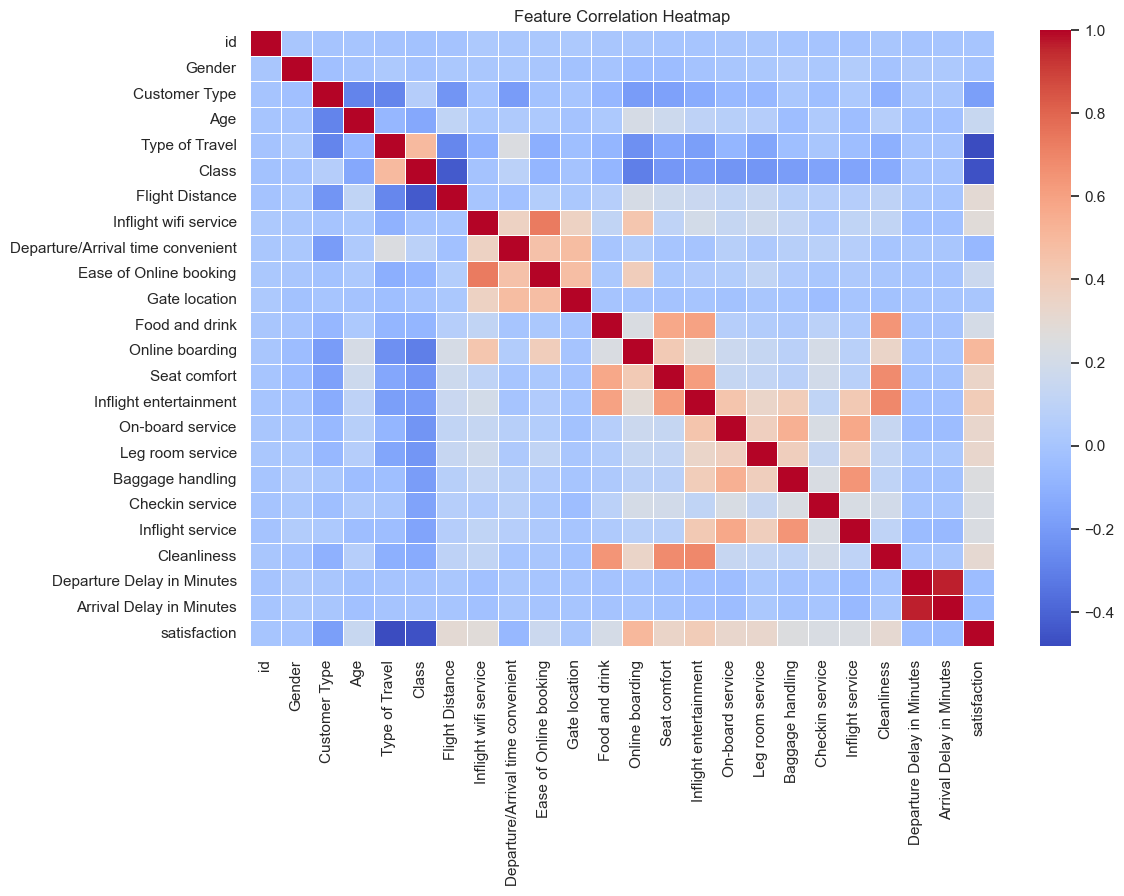

In [15]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
corr = prepared_train_data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\Victus\AppData\Local\Temp\ipykernel_15908\3440591771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Flight Distance', data=prepared_train_data, palette='coolwarm')


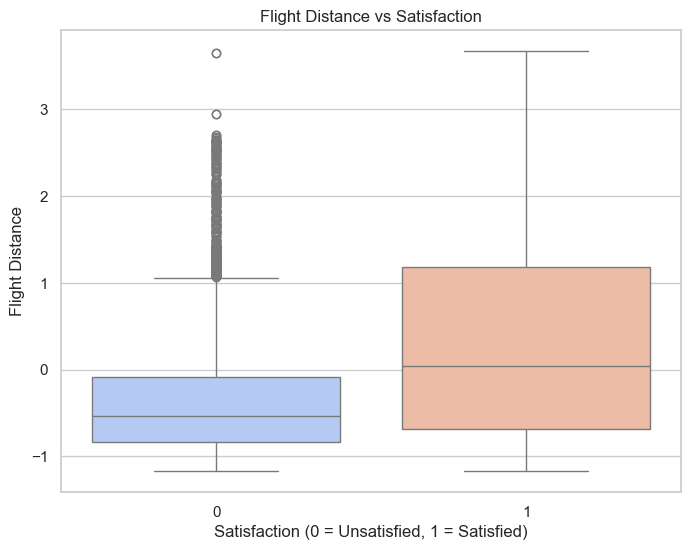

In [16]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(x='satisfaction', y='Flight Distance', data=prepared_train_data, palette='coolwarm')
plt.title('Flight Distance vs Satisfaction')
plt.xlabel('Satisfaction (0 = Unsatisfied, 1 = Satisfied)')
plt.ylabel('Flight Distance')
plt.show()

## Creating a model for this data.

In [18]:
X = prepared_train_data.drop(columns=['id', 'satisfaction'])
y = prepared_train_data['satisfaction']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

accuracy, mae, mse, r2

(0.9485, 0.0515, 0.0515, 0.794)

In [22]:
test_data = pd.read_csv("https://raw.githubusercontent.com/Burxoniddin-data/aviacompany_customer_satisfaction/main/test_dataset.csv")
test_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [23]:
prepared_test_data = pipeline.fit_transform(test_data)
prepared_test_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,-1.009499,1,1,1.467574,-0.556390,-0.657055,-0.544341,...,1.126410,-1.067904,0.466008,0.460832,-0.531651,1.324326,-2.261943,1.250539,3.893507,4.947805
1,2,0,0,0.617987,0,0,0.400007,-1.280621,-1.300438,-1.234692,...,0.368268,-1.067904,-1.102382,-1.025124,-1.373871,0.529174,-1.417777,-0.265036,1.300368,1.060253
2,3,1,0,0.753611,0,0,-0.869026,0.892071,0.629711,0.836359,...,1.126410,1.201014,1.250203,1.203810,1.152788,0.529174,1.114721,0.492752,-0.390810,-0.394083
3,4,1,0,-0.399192,0,2,-1.109006,-2.004851,-1.943821,-1.925042,...,-1.906159,1.201014,0.466008,0.460832,-2.216090,-0.265978,-0.573611,1.250539,-0.390810,-0.394083
4,5,1,0,-0.399192,1,1,-0.608306,0.892071,0.629711,0.836359,...,1.126410,1.201014,0.466008,1.203810,0.310568,1.324326,1.114721,1.250539,3.273408,3.521437


In [24]:
test_data.drop(['id'], axis=1, inplace=True)
X_final_val = prepared_test_data

In [25]:
y_final_pred = model.predict(X_final_val)
y_final_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [26]:
test_data["satisfaction"] = y_final_pred
test_data['id'] = range(1, len(test_data) + 1)
test_data.to_csv("predictions.csv", index=False, columns=['id', 'satisfaction'])